In [58]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [59]:
df = pd.read_csv('placement.csv')

In [60]:
df.head()
df.shape

(200, 2)

Text(0, 0.5, 'Package(in lpa)')

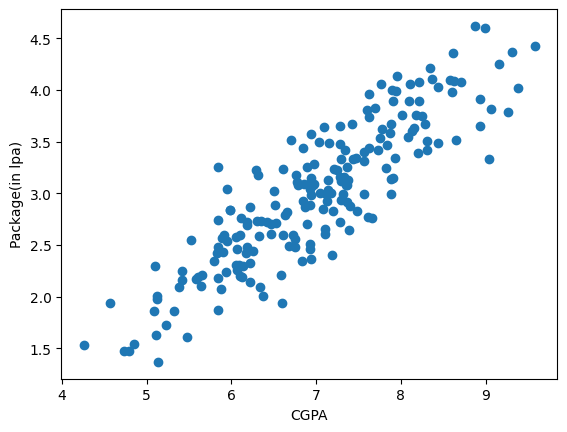

In [61]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [62]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [63]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
lr = LinearRegression()

In [67]:
lr.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


Text(0, 0.5, 'Package(in lpa)')

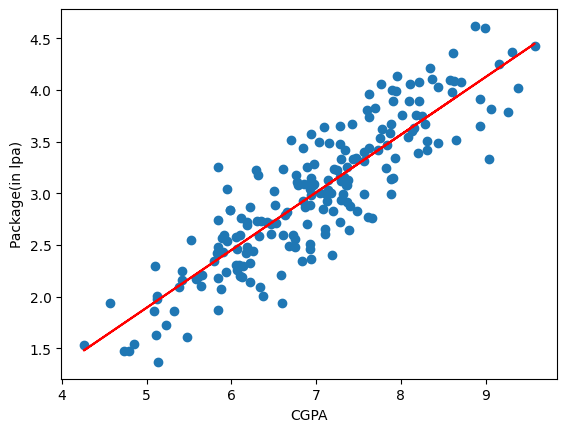

In [68]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [69]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [70]:
y_pred = lr.predict(X_test)

In [71]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

### Mean Absolute Error

In [72]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


### Mean Squared Error

In [73]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


### Root Mean Square Error

In [74]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


### Calculating R2 score

In [75]:
print("R2 Score =",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 Score = 0.780730147510384


In [76]:
# Adjusted R2 score
X_test.shape

(40, 1)

### Adjusted R2 Score

In [77]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [78]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.825833,3.26
1,5.12,0.202930,1.98
2,7.82,0.972230,3.25
3,7.42,0.931655,3.67
4,6.94,0.346766,3.57


Text(0, 0.5, 'Package(in lpa)')

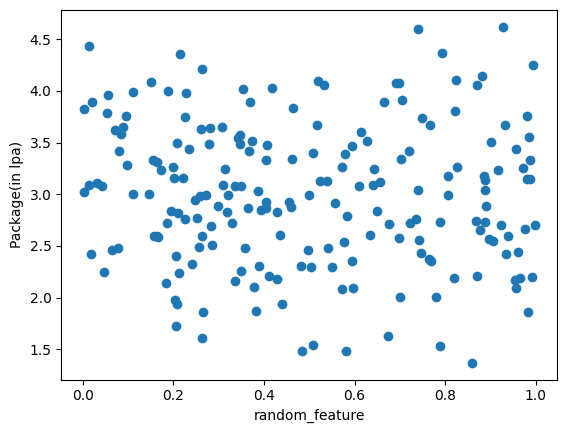

In [79]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [80]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [81]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [82]:
lr = LinearRegression()

In [83]:
lr.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [84]:
y_pred = lr.predict(X_test)

In [85]:
print("R2 score = ",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score =  0.7785467599891669


In [86]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7665763145831759

In [87]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [88]:
new_df2.sample(5)

,cgpa,iq,package
154,7.08,2.45,2.85
183,7.28,2.92,2.72
142,6.93,3.34,3.04
166,8.60,4.88,3.98
176,6.29,4.23,3.23


Text(0, 0.5, 'Package(in lpa)')

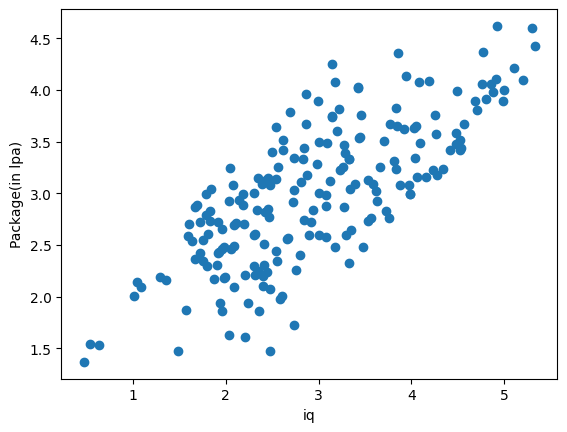

In [89]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [90]:
np.random.randint(-100,100)

-40

In [91]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [92]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [93]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [95]:
print("R2 score =",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score = 0.8278130883634097


In [96]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.8185056877344048